In [ ]:
#5.1 PSP_travelTime
import matplotlib.pyplot as plt
import numpy as np
from PSP_travelTime import*
from dataTDRSoil.dat import*


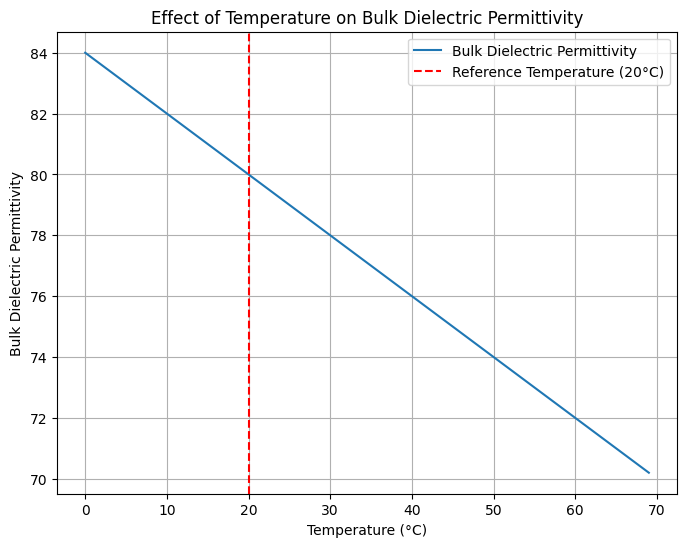

In [1]:
#5.2
import numpy as np
import matplotlib.pyplot as plt

# Constants
temperature_range = np.arange(0, 70, 1)  # Temperature range (°C)
dielectric_permittivity_ref = 80  # Reference dielectric permittivity at 20°C

# Function to compute bulk dielectric permittivity based on temperature
def compute_bulk_permittivity(temperature, permittivity_ref):
    # Assume a linear relationship between temperature and permittivity for this example
    # You may need to use a more accurate model based on your specific scenario
    # Here, we'll use a simple linear relationship for demonstration purposes
    slope = -0.2  # Change in permittivity per degree Celsius
    return permittivity_ref + slope * (temperature - 20)

# Compute bulk dielectric permittivity for the temperature range
bulk_permittivity = compute_bulk_permittivity(temperature_range, dielectric_permittivity_ref)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temperature_range, bulk_permittivity, label='Bulk Dielectric Permittivity')
plt.title("Effect of Temperature on Bulk Dielectric Permittivity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bulk Dielectric Permittivity")
plt.axvline(x=20, color='r', linestyle='--', label='Reference Temperature (20°C)')
plt.legend()
plt.grid(True)
plt.show()


#5.2  With increase in temperature the bulk dielectric permittivity decreases.
Decrease in bulk permittivity reduce the sensitivity to moisture and limit measurement range, which will hinder the accurate measurement of soil water content.
Decrease in bulk dielectric permittivity decrease the soil water content> Eq: θ = 0.1138 sqrtεb – 0.1758. However, Empirical equations based only on bulk dielectric measurement (like the Topp et al. (1980) or Malicki et al. (1996) models) can therefore never be accurate for all soils.

In [2]:
#5.3
# Given constants
gamma = 72.75e-3  # Surface tension of water (N/m)
theta = 0         # Contact angle (degrees)
diameter = 10e-6  # Diameter of the pore (m)

# Compute radius from diameter
radius = diameter / 2

# Compute matric potential
matric_potential = (2 * gamma * np.cos(np.deg2rad(theta))) / radius

print("Matric water potential:", matric_potential, "Pa")

Matric water potential: 29099.999999999996 Pa


In [3]:
#5.4
import numpy as np
from scipy.integrate import quad
from PSP_TTwaterContent import getBulkPermittivity, getWaterContentMixModel, getLiquidPermittivity

# Constants and parameters
probe_length = 0.15  # Assuming the length of the probe (m)
Vp = 0.9  # Assuming the velocity factor for TDR probes
solid_permittivity = 4  # Solid-phase dielectric permittivity
temperature = 25  # Temperature of the soil (°C)
bulk_density = 1.3  # Bulk density of the clay soil (g/cm^3)
alpha = 0.17  # Van Genuchten's alpha parameter
depth = 1  # Depth of the soil profile (m)

# Define the integrand function for water content computation
def integrand(z):
    bulk_permittivity = getBulkPermittivity(probe_length, z, Vp)
    return getWaterContentMixModel(bulk_permittivity, bulk_density, solid_permittivity,
                                   getLiquidPermittivity(temperature), alpha)

# Integrate the water content over the depth of the soil profile
total_water_content, _ = quad(integrand, 0, depth)

# Convert water content from m^3/m^3 to cm^3/cm^3 (1 m^3/m^3 = 1000 cm^3/cm^3)
total_water_content_cm3_cm3 = total_water_content * 1000

print("Total water content in the clay soil profile:", total_water_content_cm3_cm3, "cm^3/cm^3")

Total water content in the clay soil profile: 750687.6289439984 cm^3/cm^3


In [4]:
#5.6
# Given van Genuchten parameters
alpha = 0.15   # Alpha (1/m)
n = 1.35      # n
theta_r = 0.01  # Residual water content
theta_s = 0.46  # Saturated water content

# Given water potentials (J/kg)
psi_FC = -33   # Field capacity
psi_PWP = -1500  # Permanent wilting point

# Function to compute water content using van Genuchten's equation
def van_genuchten(psi, alpha, n, theta_r, theta_s):
    m = 1 - (1 / n)
    theta = theta_r + (theta_s - theta_r) / (1 + (alpha * abs(psi)) ** n) ** m
    return theta

# Compute water content at field capacity and permanent wilting point
theta_FC = van_genuchten(psi_FC, alpha, n, theta_r, theta_s)
theta_PWP = van_genuchten(psi_PWP, alpha, n, theta_r, theta_s)

# Compute plant available water
PAW = theta_FC - theta_PWP

print("Water content at field capacity:", theta_FC)
print("Water content at permanent wilting point:", theta_PWP)
print("Plant available water:", PAW)

Water content at field capacity: 0.2599204483672994
Water content at permanent wilting point: 0.07758860497726532
Plant available water: 0.18233184339003405


#5.7
Derivation of Capacity for Campbell's Equation Campbell's equation: θ=θs(1+αψ/ψ )^-β 
Where: θ is the volumetric water content 
θs is the saturated volumetric water content 
ψ is the water potential 
α and β are empirical parameters 
To compute the derivative of Campbell's equat on with respect to ψ, 
we use the chain rule: dθ/dψ=dθ/(d(αψ/∣ψ∣)) ⋅(d(αψ/∣ψ∣))/dψ
Now, let's derive the derivative: dθ/dψ=-βθs(1+αψ/(∣ψ∣))^(-(β+1) )* α/(∣ψ∣)

Derivation of Capacity for van Genuchten's Equation van Genuchten's equation: θ=θr+(θs-θr)*((1+αψ/(∣ψ∣))^n )^-m 
Where: θ is the volumetric water content
θr is the residual volumetric water content 
θs is the saturated volumetric water content
ψ is the water potential
α, n, and m are empirical parameters 
To compute the derivative of van Genuchten's equation with respect to ψ, 
we use the chain rule as well. dθ/dψ=(θs-θr)m(1+(αψ/(∣ψ∣)))^n)^-(m+1) *αn/(∣ψ∣) 
These derivatives provide insights into how the water content changes with respect to changes in water potential, which is crucial in understanding soil water retention characteristics.

In [5]:
#5.7
import numpy as np

# Derivative of van Genuchten’s equation with respect to ψ
def d_theta_d_psi_van_genuchten(psi, theta_r, theta_s, alpha, n):
    term1 = -alpha * (theta_s - theta_r) * np.abs(psi)**(n - 1)
    term2 = (1 + (alpha * np.abs(psi))**n)**(-(1/n) - 1)
    return term1 * term2

# Derivative of Campbell’s equation with respect to ψ
def d_theta_d_psi_campbell(psi, theta_s, b, m):
    term1 = -m * b * psi**(m - 1)
    term2 = (1 + (b * np.abs(psi))**m)**(-2)
    return term1 * term2

# Test the functions
psi = -100  # Example value of ψ

# Parameters for van Genuchten’s equation
theta_r = 0.01
theta_s = 0.46
alpha = 0.15
n = 1.35

# Parameters for Campbell’s equation
b = 0.5
m = 3

# Compute derivatives
d_theta_d_psi_vg = d_theta_d_psi_van_genuchten(psi, theta_r, theta_s, alpha, n)
d_theta_d_psi_cb = d_theta_d_psi_campbell(psi, theta_s, b, m)

# Print results
print("Derivative of van Genuchten’s equation with respect to ψ:", d_theta_d_psi_vg)
print("Derivative of Campbell’s equation with respect to ψ:", d_theta_d_psi_cb)


Derivative of van Genuchten’s equation with respect to ψ: -0.0005574465613154419
Derivative of Campbell’s equation with respect to ψ: -9.59984640184318e-07


In [52]:
#5.5
from __future__ import division
import numpy as np
from math import *
await clay.txt 
clay_data=np.genfromtxt("clay.txt",skip_header=1, dtype=float)
with open ('clay.txt'):
    print('data from clay.txt')

def Campbell(v, psi, theta):
    thetaS = v[0]
    he = v[1]
    Campbell_b= v[2]
    for i in range(len(psi)):
        if psi[i] <= he:
            theta[i] = thetaS
        else:
            Se = (psi[i]/he)**(-1./Campbell_b) 
            theta[i] = Se * thetaS 

def VanGenuchten(v, psi, theta):
    thetaS = v[0]
    VG_thetaR = v[1]
    VG_alpha = v[2]
    VG_n = v[3]
    VG_m = v[4]
    for i in range(len(psi)):
        Se = 1. / pow(1. + pow(VG_alpha * psi[i], VG_n), VG_m)       
        theta[i] = Se * (thetaS - VG_thetaR) + VG_thetaR

def VanGenuchtenRestricted(v, psi, theta):
    thetaS = v[0]
    VG_thetaR = v[1]
    VG_alpha = v[2]
    VG_n = v[3]
    VG_m = 1. - (1. / VG_n)
    for i in range(len(psi)):
        if psi[i] <= 0: 
            Se = 0
        else:
            Se = (1. + (VG_alpha * abs(psi[i]))**VG_n)**(-VG_m)       
        theta[i] = Se * (thetaS - VG_thetaR) + VG_thetaR  
        

<class 'NameError'>: name 'clay' is not defined